In [1]:
from utils import *

In [2]:
# convert mp3 to wav
pdub_song = AudioSegment.from_wav("In My Blood.wav")
pdub_song.export("In My Blood.mp3", "mp3")
pdub_song

In [8]:
samplerate, data = wavfile.read("In My Blood.wav")
length = data.shape[0] / samplerate

In [9]:
samplerate, data = ensure_sample_rate(samplerate, data, desired_sample_rate=1600) #convert to low bit rate seems to be a good feature extraction thing : D
# wavfile.write(f'In My Blood br{samplerate}.wav', int(samplerate), data)
data = data / (2**15) # normalize

In [10]:
# plot_wav(data,length)

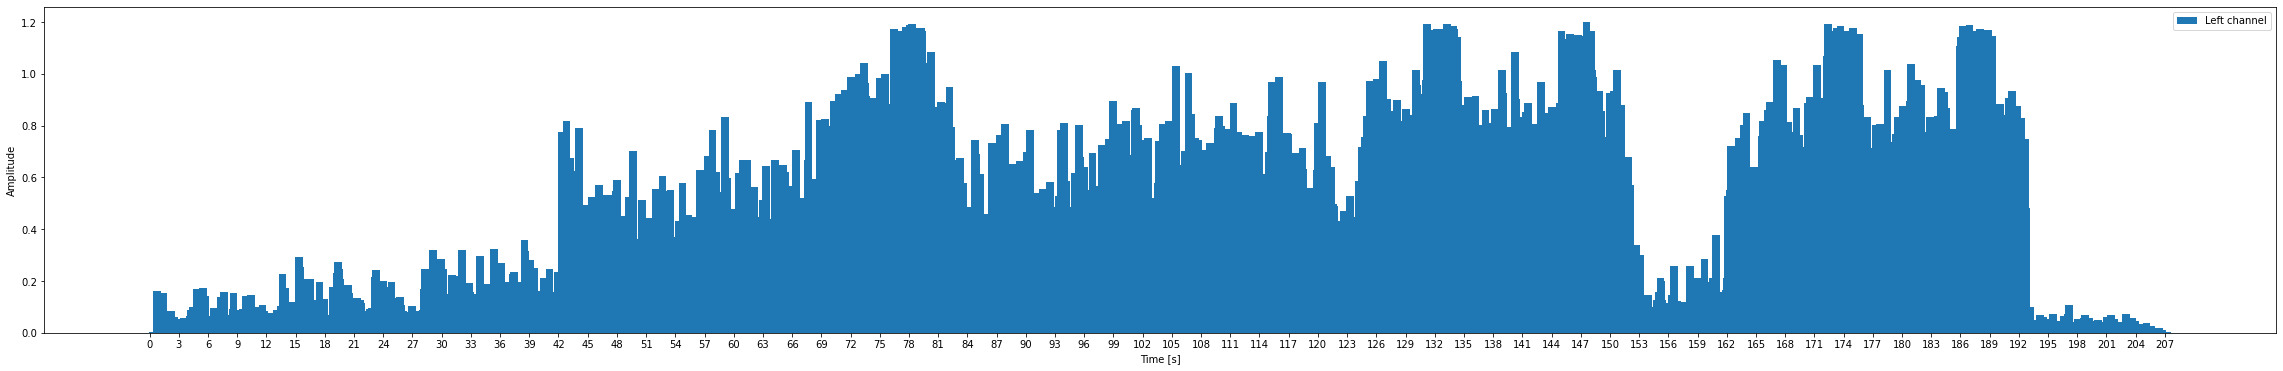

In [11]:
data = np.mean(data,axis=1) # downsize to 1 channel
data = np.mean(data.reshape(-1,closest_number_in_list(samplerate/16,factors_of(data.size))),axis=1)
data = abs(data)
data = np.array(list(map(normalize, data)))
plot_bar(data,length)

In [26]:
ahap = AHAP()

In [27]:
for i, v in enumerate(data.reshape(-1)):
    v = float(v)
    if v > 0.2:
        ahap.add_haptic_transient_event(length/data.size*i,haptic_intensity=v,haptic_sharpness=v)
    ahap.add_haptic_continuous_event(length/data.size*i,event_duration=length/data.size,haptic_intensity=v,haptic_sharpness=v)

In [28]:
# ahap.add_audio_custom_event(time=0.0,wav_filepath="In My Blood.wav",volume=0.75)

In [29]:
# ahap.add_haptic_transient_event(0.0,1,1)
# ahap.add_haptic_transient_event(0.5,1,0.7)

In [30]:
ahap.export('imb.ahap','')